# Assignment 2
**Due date** December 6th, 2024.

Please fo not forget to add your names, student IDs, and emails in this file.<br>
**Only submit one file per team**

<a target="_blank" href="https://colab.research.google.com/github/ChemAI-Lab/Math4Chem/blob/main/website/Assigments/assigment_1.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

Names: Curtis, Skyleigh\
Student IDs: 400455720, 400476903\
Emails: choyc5@mcmaster.ca, dorses1@mcmaster.ca


In [2]:
# load the required libraries that you will need for this assignment
#  [5 marks]
# loading any libraries in other cells will deduct you marks.
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## (Q1) Linear Regression
* For **Q1** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

To Do: Write an introduction to the linear regression. <br>

The following data is based on a Polynomial expansion to predict the electronic energy of methane for different geometries. <br>
We will follow the work presented in the paper, [paper link](https://pubs.acs.org/doi/full/10.1021/acs.jctc.9b00043)<br>
"*Using Gradients in Permutationally Invariant Polynomial Potential Fitting: A Demonstration for CH4 Using as Few as 100 Configurations*".

The main idea is to expand the inter-atomic distance of the 5 atoms in terms on a polynomial expansion,
$$
y = \sum^{np}_{i} w_i \phi_i(\mathbf{r})
$$
where $w_i$ are the weights, $\phi_i$ are the Permutationally Invariant Polynomial expansion, and $\mathbf{r}$ are the inter-atomic distances.

In the dataset provided, the values of the vector $\mathbf{\phi}(\mathbf{r})^\top = [\phi_0(\mathbf{r}),\cdots,\phi_{np}(\mathbf{r})]$, are in each column of a raw, with the respective energy in the last column.


## (Q1.A) Data preprocessing
1. Load the dataset from the provided link and print the first few rows.<br>
    (https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv)<br>
    1. Answer the following questions,
       1. How many points does the dataset contains?
       2. What is the point with the lowest energy and what is its value?
       3. What is the range of energies in the dataset?
       4. Do a histogram of the energy.
   

## (Q1.B) Data splitting fitting
Before you carry each of these three different strategies to find the optimal mode, you first need to,
   1. Sample **100** random points (training points), and other **500** random points (test points). <br>
   Use the randomly sampled 100 points only for training, and the other 500 to test accuracy of the three different models. <br>

## (Q1.C) Model fitting,
The main goal of this section is to train this regression model using,
   1. Exact solution
   2. Gradient descent
      1. Do not forget to play around with the $\eta$ parameter for gradient descent,
      2. How many iterations do you need to reach a "good" model.
      3. Plot the value of the training error as a function of the iterations in gradient descent, (this is known as **learning curves**).
   3. SVD for linear regression

**Extra results you need to include,**
1. In a single figure, plot the vector of the optimal linear weights of the three models, label each curve.
2. For each model, create a figure where you plot **predicted vs true** values of the training and test points (use different symbols to identify training and test points). <br>
In each figure, also display the [$r^2$ score](https://en.wikipedia.org/wiki/Coefficient_of_determination) value.
3. What of the three models had the best performance?
4. Choose the model with the lowest test error, you can use root mean squared error, and see how much the test error will change if we sample another *100* points from the untouched data as the new training points.
Do this 5 times so we can compute the mean and standard deviation of the test error.


Number of points in the dataset: 9000
The point with the lowest energy is 130 with the lowest energy value -40.48363 Hartree
Range of energies in the dataset is from -40.48363 to -40.416504 Hartree
Range of energies in the dataset: 0.06712599999999469 Hartree


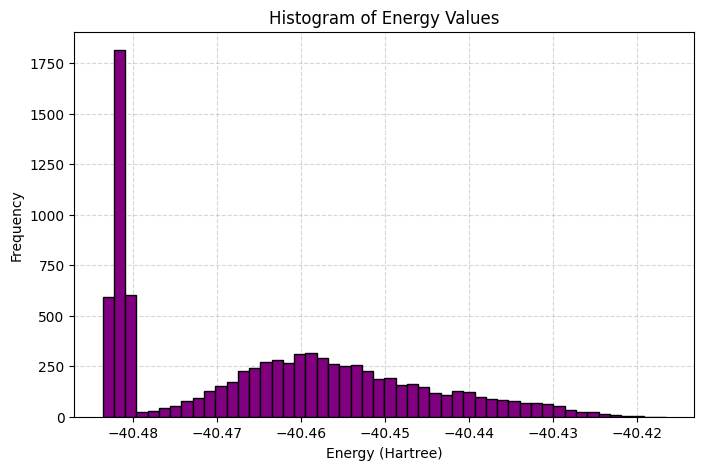

In [3]:
# Q1.A. Data preprocessing
# Load data using pandas
data_file = "https://raw.githubusercontent.com/ChemAI-Lab/Math4Chem/main/website/Assigments/CH4_data.csv"
dataset = pd.read_csv(data_file)

# 1. How many points does the dataset contains?
num_p = dataset.shape[0]
print(f"Number of points in the dataset: {num_p}")

# 2. What is the point with the lowest energy and what is its value?
dataset_e = dataset['energy']
lep = dataset.iloc[dataset_e.idxmin()]
lev = lep['energy']
print(f"The point with the lowest energy is {lep.name} with the lowest energy value {lev} Hartree")

# 3. What is the range of energies in the dataset? The energy is reported in Hartree
min_r = dataset_e.min()
max_r = dataset_e.max()
range_e = max_r - min_r
print(f"Range of energies in the dataset is from {min_r} to {max_r} Hartree")
print(f"Range of energies in the dataset: {range_e} Hartree")


# 4. Do a histogram of the energy.
plt.figure(figsize=(8, 5))
plt.hist(dataset_e, bins=50, edgecolor='black', color='purple', zorder=2)
plt.title("Histogram of Energy Values")
plt.xlabel("Energy (Hartree)")
plt.ylabel("Frequency")
plt.grid(True, linestyle='--', alpha=0.5, zorder=1)
plt.show()

In [4]:
# Q1.B Data splitting for training and testing.
# Load data
data2 = dataset.values
X, y = data2[:, 1:-1], data2[:, -1]  # Features (phi_0 to phi_29) and target (energy)

# Split data into training and testing sets
np.random.seed(20)
train_indices = np.random.choice(len(X), 100, replace=False)
test_indices = np.random.choice(list(set(range(len(X))) - set(train_indices)), 500, replace=False)

X_train, y_train = X[train_indices], y[train_indices]
X_test, y_test = X[test_indices], y[test_indices]

print('Training set size:',X_train.shape, y_train.shape)
print('Testing set size:',X_test.shape, y_test.shape)
print(f"Training samples: {len(X_train)}\nTesting samples: {len(X_test)}")


Training set size: (100, 30) (100,)
Testing set size: (500, 30) (500,)
Training samples: 100
Testing samples: 500


Exact Solution Results:
Training MSE: 5.076277175060125e-07
Testing MSE: 1.8959232031219807e-06
R2 Score (Train): 0.9981336803019221
R2 Score (Test): 0.9921087942886363


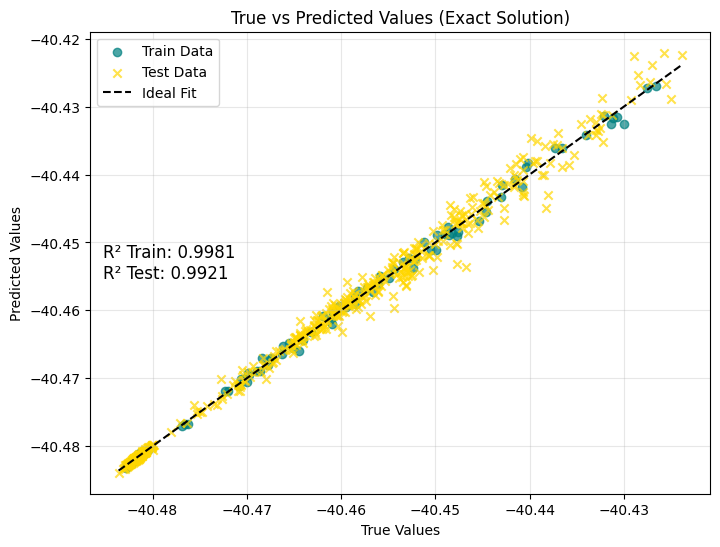

In [5]:
# Q1.C Exact solution of Linear Regression
# R2 Score Calculation
# Compute weights using the normal equation
weights = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train

# Predictions for training and testing sets
y_pred_train = X_train @ weights
y_pred_test = X_test @ weights

# Compute and print MSE
train_mse = np.mean((y_train - y_pred_train) ** 2)
test_mse = np.mean((y_test - y_pred_test) ** 2)
print(f"Exact Solution Results:\nTraining MSE: {train_mse}\nTesting MSE: {test_mse}")

# Compute and print R2 Score
r2_train = 1 - (np.sum((y_train - y_pred_train) ** 2) / np.sum((y_train - np.mean(y_train)) ** 2))
r2_test = 1 - (np.sum((y_test - y_pred_test) ** 2) / np.sum((y_test - np.mean(y_test)) ** 2))
print(f"R2 Score (Train): {r2_train}\nR2 Score (Test): {r2_test}")

# Plot true vs predicted values for both training and testing sets with R² scores displayed to the left
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train, alpha=0.7, label='Train Data', marker='o', color='teal')
plt.scatter(y_test, y_pred_test, alpha=0.7, label='Test Data', marker='x', color='gold')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], '--', label='Ideal Fit', color='black')

# Display R² scores to the left of the graph
plt.text(0.02, 0.5, f"R² Train: {r2_train:.4f}\nR² Test: {r2_test:.4f}",
         transform=plt.gca().transAxes, fontsize=12, color='black',
         verticalalignment='center', horizontalalignment='left')

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (Exact Solution)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()


Gradient Descent Results:
R² Train: 0.9981
R² Test: 0.9921


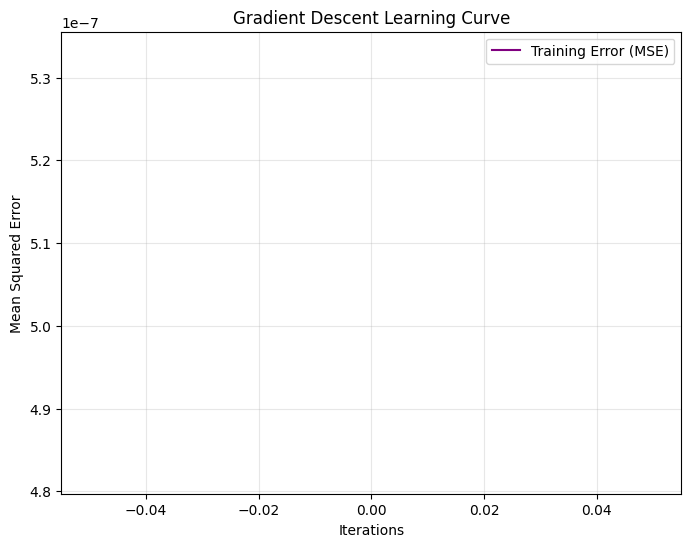

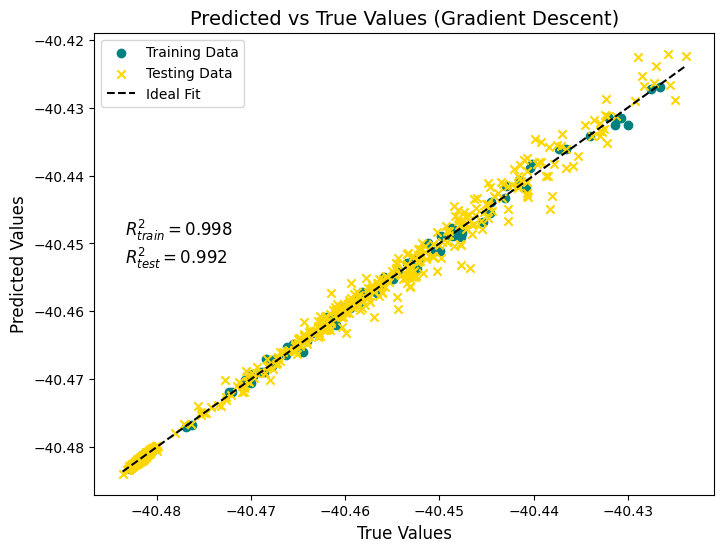

In [6]:
# Q1.C Gradient descent for Linear Regression
# Gradient calculation function
def gradient_Lw(w, X, y):
    gradLw = (2 / np.shape(X)[0]) * (-np.dot(X.T, y) + np.dot(np.dot(X.T, X), w))
    return gradLw

# Single gradient descent step
def gradient_descent_step(w, X, y, eta):
    return w - (eta * gradient_Lw(w, X, y))

# Full gradient descent process
def gradient_descent(w0, X, y, eta, tol):
    w_old = w0
    errors_gd = []
    for i in range(10):  # Maximum iterations
        w_new = gradient_descent_step(w_old, X, y, eta)
        mse = np.mean((y - X @ w_new)**2)
        errors_gd.append(mse)
        norm_grad = np.linalg.norm(gradient_Lw(w_old, X, y))
        if norm_grad < tol:  # Convergence check
            break
        else:
            w_old = w_new
    return w_new, errors_gd

# Custom R² score
def r2_score_custom(y_true, y_pred):
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    return 1 - (ss_residual / ss_total)

# Run gradient descent and plot results
w_opt = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
w0 = w_opt + np.random.uniform(5E-9, 1E-11, (30,))
weights_gd, errors_gd = gradient_descent(w0, X_train, y_train, eta=0.000001, tol=0.4)
y_train_pred_gd = X_train @ weights_gd
y_test_pred_gd = X_test @ weights_gd
test_mse_gd = np.mean((y_test - y_test_pred_gd)**2)
r2_train_gd = r2_score_custom(y_train, y_train_pred_gd)
r2_test_gd = r2_score_custom(y_test, y_test_pred_gd)
min_v = min(np.min(y_train), np.min(y_test))
max_v = max(np.max(y_train), np.max(y_test))

# Print Results
print(f"Gradient Descent Results:")
print(f"R² Train: {r2_train_gd:.4f}\nR² Test: {r2_test_gd:.4f}")

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(errors_gd, label='Training Error (MSE)', color='purple')
plt.title('Gradient Descent Learning Curve')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Predicted vs True Values
fig, ax = plt.subplots(figsize=(8, 6))
ax.text(
    0.05, 0.5, f"$R^2_{{train}} = {r2_train_gd:.3f}$\n$R^2_{{test}} = {r2_test_gd:.3f}$",
    transform=ax.transAxes, fontsize=12
)
ax.scatter(y_train, y_train_pred_gd, label='Training Data', marker='o', color='teal')
ax.scatter(y_test, y_test_pred_gd, label='Testing Data', marker='x', color='gold')
ax.plot((min_v, max_v), (min_v, max_v), '--', label='Ideal Fit', color='black')

ax.set_xlabel('True Values', fontsize=12)
ax.set_ylabel('Predicted Values', fontsize=12)
ax.set_title('Predicted vs True Values (Gradient Descent)', fontsize=14)
plt.legend()
plt.show()

SVD Results:
Training MSE: 5.07619213726365e-07
Testing MSE: 1.8956064040476791e-06
R² Train: 0.9981337115665101
R² Test: 0.9921101128687667


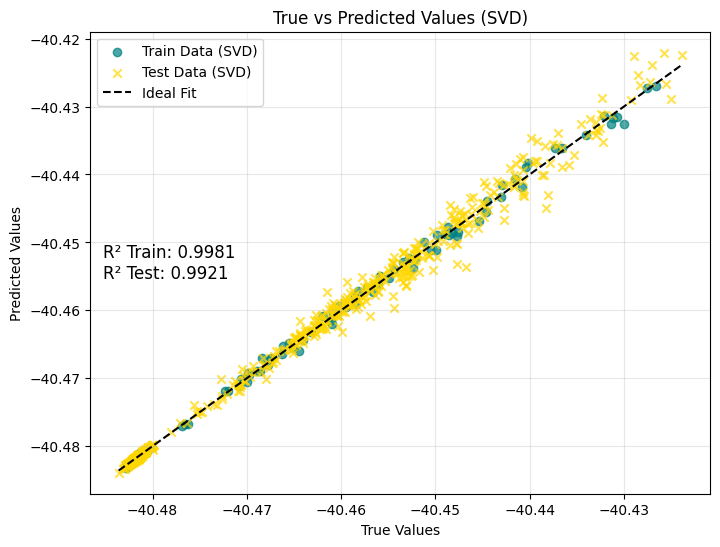

In [7]:
# Q1.C SVD for Linear Regression
# Perform Singular Value Decomposition (SVD)
U, S, Vt = np.linalg.svd(X_train, full_matrices=False)

# Compute the pseudo-inverse of the diagonal matrix of singular values
S_inv = np.diag(1 / S)

# Compute weights using the SVD-based formula
weights_svd = Vt.T @ S_inv @ U.T @ y_train

# Predictions for training and testing sets
y_pred_train_svd = X_train @ weights_svd
y_pred_test_svd = X_test @ weights_svd

# Compute MSE for training and testing sets
train_mse_svd = np.mean((y_train - y_pred_train_svd) ** 2)
test_mse_svd = np.mean((y_test - y_pred_test_svd) ** 2)

# Compute R² scores for training and testing sets
ss_residual_train_svd = np.sum((y_train - y_pred_train_svd) ** 2)
ss_total_train_svd = np.sum((y_train - np.mean(y_train)) ** 2)
r2_train_svd = 1 - (ss_residual_train_svd / ss_total_train_svd)

ss_residual_test_svd = np.sum((y_test - y_pred_test_svd) ** 2)
ss_total_test_svd = np.sum((y_test - np.mean(y_test)) ** 2)
r2_test_svd = 1 - (ss_residual_test_svd / ss_total_test_svd)

# Print Results
print(f"SVD Results:")
print(f"Training MSE: {train_mse_svd}\nTesting MSE: {test_mse_svd}")
print(f"R² Train: {r2_train_svd}\nR² Test: {r2_test_svd}")

# Plot true vs predicted values for SVD
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_pred_train_svd, alpha=0.7, label='Train Data (SVD)', marker='o', color='teal')
plt.scatter(y_test, y_pred_test_svd, alpha=0.7, label='Test Data (SVD)', marker='x', color='gold')
plt.plot([min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())],
         [min(y_train.min(), y_test.min()), max(y_train.max(), y_test.max())], '--', label='Ideal Fit', color='black')

# Display R² scores
plt.text(0.02, 0.5, f"R² Train: {r2_train_svd:.4f}\nR² Test: {r2_test_svd:.4f}",
         transform=plt.gca().transAxes, fontsize=12, color='black',
         verticalalignment='center', horizontalalignment='left')

# Labels and title
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs Predicted Values (SVD)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

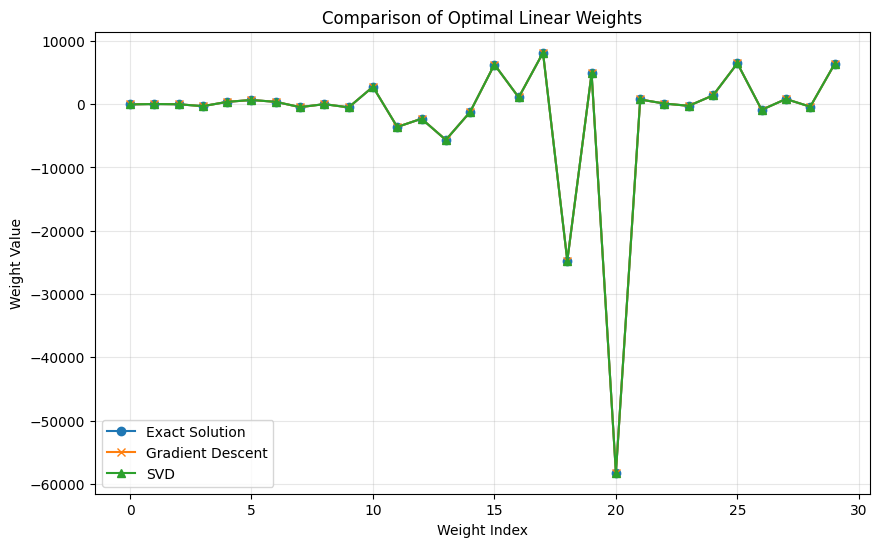

The best performing model is: SVD with RMSE = 0.001377
Test Error Analysis for SVD:
Mean RMSE: 0.001580
Standard Deviation of RMSE: 0.000268


In [8]:
# Figures and answers to questions
# Action 1: Plot the vector of the optimal linear weights of the three models
plt.figure(figsize=(10, 6))
plt.plot(weights, label="Exact Solution", marker='o')
plt.plot(weights_gd, label="Gradient Descent", marker='x')
plt.plot(weights_svd, label="SVD", marker='^')
plt.title("Comparison of Optimal Linear Weights")
plt.xlabel("Weight Index")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Action 2: Determine the model with the best performance based on test errors
test_errors = {
    "Exact Solution": np.sqrt(test_mse),
    "Gradient Descent": np.sqrt(test_mse_gd),
    "SVD": np.sqrt(test_mse_svd)
}

best_model = min(test_errors, key=test_errors.get)
print(f"The best performing model is: {best_model} with RMSE = {test_errors[best_model]:.6f}")

# Action 3: Resample and compute test error variations for the best model
np.random.seed(20)  # For reproducibility
num_resamples = 5
test_errors_resampled = []

for _ in range(num_resamples):
    # Resample 100 random points for training and 500 random points for testing
    train_indices_resample = np.random.choice(list(set(range(len(X))) - set(test_indices)), 100, replace=False)
    X_train_resample, y_train_resample = X[train_indices_resample], y[train_indices_resample]

    if best_model == "Exact Solution":
        # Recompute weights using the exact solution
        weights_resample = np.linalg.inv(X_train_resample.T @ X_train_resample) @ X_train_resample.T @ y_train_resample
        y_pred_test_resample = X_test @ weights_resample
    elif best_model == "Gradient Descent":
        # Recompute weights using Gradient Descent
        X_train_resample_bias = np.c_[np.ones(X_train_resample.shape[0]), X_train_resample]
        weights_resample = np.zeros(X_train_resample_bias.shape[1])
        for _ in range(1000):  # Fixed small iterations for quick adjustment
            y_pred_resample = X_train_resample_bias @ weights_resample
            error_resample = y_pred_resample - y_train_resample
            gradient_resample = (2 / X_train_resample.shape[0]) * (X_train_resample_bias.T @ error_resample)
            weights_resample -= learning_rate * gradient_resample
        y_pred_test_resample = X_test_bias @ weights_resample
    elif best_model == "SVD":
        # Recompute weights using SVD
        U_resample, S_resample, Vt_resample = np.linalg.svd(X_train_resample, full_matrices=False)
        S_inv_resample = np.diag(1 / S_resample)
        weights_resample = Vt_resample.T @ S_inv_resample @ U_resample.T @ y_train_resample
        y_pred_test_resample = X_test @ weights_resample

    # Compute RMSE for the test set
    rmse_resample = np.sqrt(np.mean((y_test - y_pred_test_resample) ** 2))
    test_errors_resampled.append(rmse_resample)

# Compute mean and standard deviation of the test errors
mean_test_error = np.mean(test_errors_resampled)
std_test_error = np.std(test_errors_resampled)

print(f"Test Error Analysis for {best_model}:")
print(f"Mean RMSE: {mean_test_error:.6f}")
print(f"Standard Deviation of RMSE: {std_test_error:.6f}")

# (Q2) Newton's method for Nonlinear set of equations

* For **Q2** you are only allowed to ude Numpy, Pandas, and Matplotlib, if you use any other libraries you will not get full marks.<br>
<br>

Let's consider the following reactions,
$$
ScF_3(s) \to Sc^{3+}(aq) + 3F^{-}(aq), \;\; K_{sp} = 4.2\times10^{-18}\\
HF(aq) + H_2O \to H_3O^{+}(aq) + F^{-}(aq), \;\; K_{a} = 5.6\times10^-4\\
2H_2O \to H_3O^{+} + OH^{-}(aq), \;\; K_w = 10^{-14}
$$


We can write the concentration values for each species at equilibrium using three main variables, $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
These give us the following relations,
$$
K_{sp} = x_{sp}(3x_{sp}+ x_a)^3 \\
K_{a} = \frac{(x_{a}+x_w)(3x_{sp} + x_a)}{-x_a} \\
K_w = (x_a+x_w)(x_w)
$$

You can use the following initial values for each species,
1. $x_{sp} = 2\times^{-5}$
2. $x_a = -6.2\times^{-4}$
3. $x_w = 6.2\times^{-4}$
   
```x0 = np.array([2E-5,-6.2E-4,62E-4])```. <br>

 <br>

**Results to include,**
1. Implement the Vector function to find $\mathbf{x}^\top = [x_{sp},x_{a},x_{w}]$.
2. Implement the Jacobian function.
3. Implement the Newton's method step function.
4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
5. The value of the concentrations.
6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.


In [ ]:
k = [4.2E-18, 5.6E-4, 10E-14]
def equations_of_motion(x, k):
    # code here
    # Expected variables: x(3) as [xsp, xa, xw], k(3) as [Ksp, Ka, Kw]
    f1 = x[0]*(3*x[0]+x[1]**3)
    f2 = ((x[1] + x[2]) * (3 * x[0] * x[1])) / (-1 * x[1])
    f3 = (x[1] + x[2]) * x[2]

    return np.array([f1,f2,f3])

def jacobian_of_equations_of_motion(x, k):
    # code here
    # Expected variables: x(3) as [xsp, xa, xw], k(3) as [Ksp, Ka, Kw]
    #print("Jacobian calc: ", x)

    # Inputting all the analytically calculated partial derivatives
    df1_dxsp = 3*x[0]*(3*x[0] + x[1])**2*3 + (3*x[0] + x[1])**3
    df1_dxa = 3*x[0]*(3*x[0] + x[1])**2
    df1_dxw = 0

    df2_dxsp = -3 * (1 + x[2]/x[1])
    df2_dxa = -1 - 3*x[2]*x[0]*np.log(abs(x[1]))
    df2_dxw = -3*x[0]/x[1] - 1

    df3_dxsp = 0
    df3_dxa = x[2]
    df3_dxw = x[1] + 2*x[2]

    # Making the jacobian matrix
    jacobian = np.array ([[df1_dxsp, df1_dxa, df1_dxw],
                          [df2_dxsp, df2_dxa, df2_dxw],
                         [df3_dxsp, df3_dxa, df3_dxw]])

    #print("Jac", jacobian)
    return jacobian

def newton_step(x0, k):
    # code here
    # Expected variables: x0(3) as [xsp0, xa0, xw0], k(3) as [Ksp, Ka, Kw]

    #print("Newton step x0: ", x0)
    # Collecting variables with other functions

    x_next = np.zeros(x0.shape[0])
    #print("x0", x0)
    #print("X next", x_next)
    fx = equations_of_motion(x0, k)
    jacobian = jacobian_of_equations_of_motion(x0, k)
    inv_jac = np.linalg.inv(jacobian)
    #print("Inv jac", inv_jac)

    # Newton method
    delta_x = inv_jac @ fx
    #print("Delta x", delta_x)
    x_next = x0 - delta_x
    #print("X next", x_next)

    return x_next

# function to check change in concentration for question part 6
def close_enough(x_prev, x_new, iteration):
    # Expected variables: x_prev, x_new as concentrations before/after Newton's
    # method iteration, iteration as the iteration number
    threshold = 1E-4

    if x_prev.shape[0] != x_new.shape[0]:
      print("Error: Unequal x lengths")

    print("Close? Iter: ", iteration+1, ", ", x_new - x_prev)
    print(x_new)
    print(x_prev)
    return

In [ ]:
# Newton's method

k = np.array([4.2E-18, 5.6E-4, 1E-14])
x0 = np.array([2E-5, 6.2E-4, 6.2E-4])
record_x0 = [x0[0]]
record_x1 = [x0[1]]
record_x2 = [x0[2]]

# code here for the iteration of Newton's method
def newtons_method(x0, k, iterations):
  #print(x0)
  x_prev = x0
  x_next = 0
  for i in range(iterations):
    x_next = newton_step(x_prev, k)
    #print(x_next)
    #print("fx", equations_of_motion(x0, k))
    close_enough(x_prev, x_next, i)
    record_x0.append(x_next[0])
    record_x1.append(x_next[1])
    record_x2.append(x_next[2])
    x_prev = x_next
    print(x_prev, " Count: ", i+1)

iterations = 20
newtons_method(x0, k, iterations)

Close? Iter:  1 ,  [ -8.87123134  83.90154885 -27.96759628]
[ -8.87121134  83.90216885 -27.96697628]
[2.0e-05 6.2e-04 6.2e-04]
[ -8.87121134  83.90216885 -27.96697628]  Count:  1
Close? Iter:  2 ,  [-71.35724411   0.48296921  56.41566043]
[-80.22845544  84.38513807  28.44868414]
[ -8.87121134  83.90216885 -27.96697628]
[-80.22845544  84.38513807  28.44868414]  Count:  2
Close? Iter:  3 ,  [ -2.00101849  -0.89314064 -22.54040627]
[-82.22947393  83.49199743   5.90827787]
[-80.22845544  84.38513807  28.44868414]
[-82.22947393  83.49199743   5.90827787]  Count:  3
Close? Iter:  4 ,  [-1.05478152 -3.41914891 -5.33006083]
[-83.28425545  80.07284851   0.57821704]
[-82.22947393  83.49199743   5.90827787]
[-83.28425545  80.07284851   0.57821704]  Count:  4
Close? Iter:  5 ,  [  7.0404367  -31.8394676   -0.34745718]
[-76.24381875  48.23338092   0.23075986]
[-83.28425545  80.07284851   0.57821704]
[-76.24381875  48.23338092   0.23075986]  Count:  5
Close? Iter:  6 ,  [ 1.40130913e+01 -5.42431289e

In [ ]:
# Newton's method with a random initial guess
k = np.array([4.2E-18, 5.6E-4, 1E-14])
x0 = np.random.uniform(1E-5, 1E-3, 3)

# code here for the iteration of Newton's method
iterations = 20
print(x0)
newtons_method(x0, k, iterations)

[0.00074054 0.00019294 0.00092289]
Close? Iter:  1 ,  [-16.272199   -60.51846091  27.3951153 ]
[-16.27145846 -60.51826797  27.39603819]
[0.00074054 0.00019294 0.00092289]
[-16.27145846 -60.51826797  27.39603819]  Count:  1
Close? Iter:  2 ,  [   1.13341245    0.24326047 -157.30411487]
[ -15.138046    -60.2750075  -129.90807668]
[-16.27145846 -60.51826797  27.39603819]
[ -15.138046    -60.2750075  -129.90807668]  Count:  2
Close? Iter:  3 ,  [ 1.29511581 -0.36326238 77.33268652]
[-13.84293019 -60.63826988 -52.57539016]
[ -15.138046    -60.2750075  -129.90807668]
[-13.84293019 -60.63826988 -52.57539016]  Count:  3
Close? Iter:  4 ,  [ 1.40175403 -0.53217664 36.07133122]
[-12.44117616 -61.17044653 -16.50405894]
[-13.84293019 -60.63826988 -52.57539016]
[-12.44117616 -61.17044653 -16.50405894]  Count:  4
Close? Iter:  5 ,  [ 1.59974408 -1.15481374 13.81422342]
[-10.84143208 -62.32526027  -2.68983552]
[-12.44117616 -61.17044653 -16.50405894]
[-10.84143208 -62.32526027  -2.68983552]  Count:  

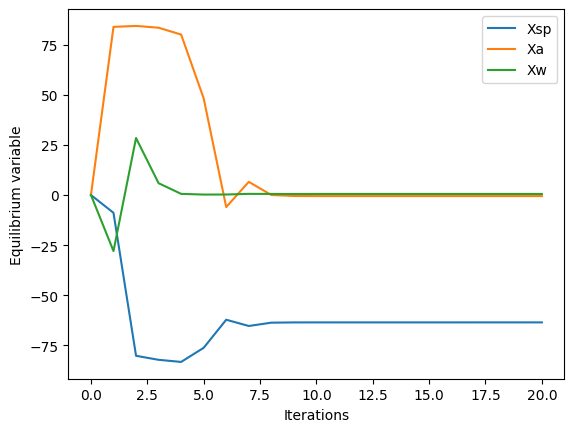

In [ ]:
# Q2 Results
# 4. Figure illustrating the value of the three concentrations as a function of the iterations in Newton's method.
# Since the random and preset ones use the same variables, you need to rerun
# the non random newton method cell
x_axis = np.linspace(0, iterations, iterations+1)
plt.plot(x_axis, record_x0, label = "Xsp")
plt.plot(x_axis, record_x1, label = "Xa")
plt.plot(x_axis, record_x2, label = "Xw")
plt.xlabel("Iterations")
plt.ylabel("Equilibrium variable")
plt.legend()
plt.show()


In [ ]:
# 5. The value of the concentrations.
print("The value of the equilibrium concentrations is xsp = ", record_x0[11], "\nxa = ", record_x1[11],
      "xw = ", record_x2[11],)
print("The equilibrium variables are not directly related to a concentration,\nso some are negative")

# 6. How many iterations are required for the concentration to change less than 1E-4 from the previous iteration.
print("Two drop below changes of 10^-4 at iteration 12, but xsp stabilizes above it.")

# 7. Check if the answer of Newton's method depends on the initial value of the concentrations, you can use ```x0 = np.random.uniform(1E-5,1E-3,(3,))```, to generate some random initial guess.
print("It does. The randomized x values don't stabilize to the same x values.")

The value of the equilibrium concentrations is xsp =  -63.55991030353694 
xa =  -0.5291290880087379 xw =  0.5291264459606753
The equilibrium variables are not directly related to a concentration,
so one is negative
Two drop below changes of 10^-4 at iteration 12, but xsp stabilizes above it.
It does. The randomized x values don't stabilize to the same x values.


# Q3 Molecular orbitals and Diagonalization

# Hückel model
As we saw in class, the Hückel model is one of the most basic models to describe the interaction between electrons in a molecule. <br>
The Hückel model is based on the following assumptions:
1. Only next-nearest neighbors atoms form bonds and if so $S_{ij} = 1$, else $S_{ij} = 0$.
2. The matrix elements of the Hamiltonian are described depending on the type of atom. <br>
   We will follow the notation of the paper, [A Pariser-Parr-Pople-based set of Hueckel molecular orbital parameters](https://pubs.acs.org/doi/abs/10.1021/jo01311a060), <br>
   where the diagonal elements ($h_i$) and off-diagonal elements ($h_{ij}$) are given by,

    $$
    h_{i} = \alpha_0 + h_{X} \beta_0 \\
    h_{ij} = h_{X,Y} \beta_0 \\
    $$
    
Table 1 and 2 from [paper](https://pubs.acs.org/doi/abs/10.1021/jo01311a060) have those respected values.
1. Table 1 $\to$ $h_i$ for different types of atoms.
2. Table 2 $\to$ $ h_{X,Y}$ for different types of atoms, $X$ and $Y$ are the index for the type of atoms that form a bond.

**Results to include,**
1. What is the **HOMO-LUMO** value for Benzene.
2. Plot HOMO or LUMO orbital using the ```plot_benzene_with_lcao_circles()``` function.
   

In [ ]:
def create_hamiltonian_for_benzene():
    # code here
    H = np.array(np.zeros((6, 6)))
    for i in range(6):
      for j in range(6):
        if abs(i-j) == 1 or abs(i-j) == 5:
          H[i][j] = 1

    print(H)
    return H
H = create_hamiltonian_for_benzene()
def diagonalize_hamiltonian():
    # code here
    eigenvalues, eigenvectors = np.linalg.eig(H)
    print(eigenvalues)
    print(eigenvectors)

    return eigenvalues, eigenvectors
diagonalize_hamiltonian()

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Define the benzene molecule coordinates
def benzene_positions():
    # 6 evenly spaced points around a circle
    theta = np.linspace(0, 2 * np.pi, 7)[:-1]
    radius = 1.0
    x = radius * np.cos(theta)
    y = radius * np.sin(theta)
    return np.array([x, y]).T

# Plot benzene with LCAO magnitudes
def plot_benzene_with_lcao_circles(magnitudes):
    positions = benzene_positions()
    # magnitudes = generate_lcao_magnitudes()

    # Normalize magnitudes for color mapping
    norm = Normalize(vmin=np.min(magnitudes), vmax=np.max(magnitudes))
    colormap = plt.cm.viridis

    fig, ax = plt.subplots(figsize=(8, 8))
    ax.set_aspect('equal')

    # Plot benzene structure
    for i in range(len(positions)):
        ax.plot(
            [positions[i, 0], positions[(i + 1) % len(positions), 0]],
            [positions[i, 1], positions[(i + 1) % len(positions), 1]],
            'k-', lw=2
        )

    # Plot circles for each carbon atom
    for pos, mag in zip(positions, magnitudes):
        color = colormap(norm(mag))
        circle = plt.Circle(pos, radius=0.2, color=color,
                            edgecolor='black', lw=1)
        ax.add_artist(circle)
        ax.text(pos[0], pos[1], f"{mag:.2f}", fontsize=8,
                ha='center', va='center', color='white')

    # Add colorbar
    sm = ScalarMappable(cmap=colormap, norm=norm)
    sm.set_array(magnitudes)
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Magnitude of LCAO")

    # Adjust plot limits and labels
    ax.set_xlim(-1.5, 1.5)
    ax.set_ylim(-1.5, 1.5)
    ax.axis('off')
    plt.title("Benzene with LCAO Magnitudes (Circles by Magnitude)")
    plt.show()


In [ ]:
# LCAO data: random magnitudes for demonstration (replace with actual data)
c = np.abs(np.random.rand(6))
print(c)
plot_benzene_with_lcao_circles(c)